# Logistic Regression

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [33]:
df=pd.read_csv("./mushroom_cleaned.csv")

In [34]:
X = df.drop(columns=['class'])

In [35]:
# Chuẩn hóa
scaler = StandardScaler()
scaler.fit(X) # Tính trung bình và độ lệch chuẩn của từng đặc trưng
X = scaler.transform(X) # Trừ tb và chia cho độ lệch chuẩn

In [36]:
# Xử lý outlier

from scipy import stats

# Hàm để loại bỏ outlier bằng Z-score
def remove_outliers_zscore(df, column, threshold=2):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores < threshold)]

# Loại bỏ outlier trong các cột 'stem-width', 'stem-height'
df = remove_outliers_zscore(df, 'cap-diameter')
df = remove_outliers_zscore(df, 'stem-width')
df = remove_outliers_zscore(df, 'stem-height')

print(df.shape)  # Kích thước dữ liệu sau khi loại bỏ outlier

(46211, 9)


In [37]:
# chia tập 
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train)

In [46]:
# Baseline
LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)
print(f'Baseline accuracy: {LR.score(X_val, y_val)}')

Baseline accuracy: 0.6292377975474874


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Dùng Regularization và cross validation
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'sag'],
    'max_iter': [200, 500, 1000]
}
LR = LogisticRegression(class_weight='balanced')
LR_regu = GridSearchCV(LR, param_grid=param_grid, scoring='accuracy', cv=5)
LR_regu.fit(X_train, y_train)
LR_regu.score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\

0.6427025727338302

In [42]:
LR_regu.best_params_

{'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}

In [43]:
# Dự đoán
y_pre = LR_regu.predict(X_test)

In [44]:
evaluate = classification_report(y_test, y_pre, output_dict=True)
evaluate_df = pd.DataFrame(evaluate).transpose()
evaluate_df

,precision,recall,f1-score,support
0,0.611485,0.633070,0.622090,2153.000000
1,0.669870,0.649251,0.659399,2469.000000
accuracy,0.641714,0.641714,0.641714,0.641714
macro avg,0.640678,0.641160,0.640745,4622.000000
weighted avg,0.642674,0.641714,0.642020,4622.000000


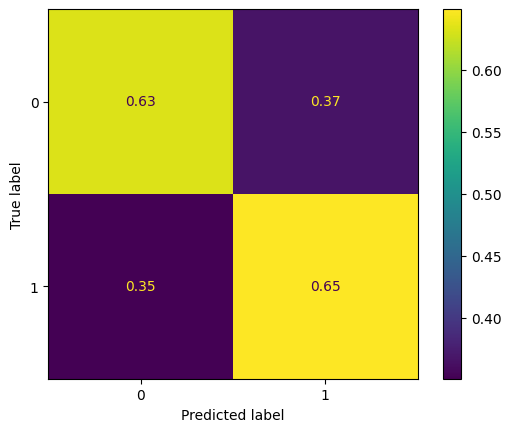

In [45]:
cf = confusion_matrix(y_test, y_pre, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()